# Multi Objective Optimization Examples

## Solve Eggholder and Schwefel Functions
Eggholder has global minimum at *f(x)= -959.6407* at *x=[512, 404.2319]*

Schwefel has global minimum at *f(x)= 0* at *x=[420.987, 420.987]* for d=2

The Weighted Aggregate will simply be the mean between the two functions: F(x)=0.5 *f1* +0.5 *f2*

## Weighted Aggregation

In [5]:
# load in necessary libraries
import EvolutionaryComputation.OptimizationFunctions as opt_fun
import EvolutionaryComputation.GeneticAlgorithms as ga

In [9]:
# define optimization function One
f1 = opt_fun.eggholder_function  # minimum at f(x)=-959.6407

# define optimization function Two
f2 = opt_fun.schwefel_function  # minimum at f(x)=0

def fitness_function(x):
    
    return 0.5*f1(x)+0.5*f2(x)

# number of dimensions
d = 2  # eggholder only supports 2 dimensions

# define bounds
lower_bound = [-512]*d
upper_bound = [512]*d

# define number of solutions per generation
gen_size = 200

In [10]:
# define the algorithm
algorithm = ga.GenericUnconstrainedProblem(fitness_function=fitness_function, 
                                          upper_bound=upper_bound, lower_bound=lower_bound,
                                          gen_size=gen_size)

GENERATION 0:
  Best Fit: -187.78750164506698, Mean Fit: 415.28949301012574
GENERATION 1:
  Best Fit: -395.7838666696724, Mean Fit: 153.31834280861003
GENERATION 2:
  Best Fit: -395.7838666696724, Mean Fit: 28.976906684197353
GENERATION 3:
  Best Fit: -415.82430502374984, Mean Fit: -68.09550670045603
GENERATION 4:
  Best Fit: -415.82430502374984, Mean Fit: -154.3041449697805
GENERATION 5:
  Best Fit: -421.59291232178646, Mean Fit: -236.2162343957446
GENERATION 6:
  Best Fit: -423.6174769935983, Mean Fit: -298.74179869663107
GENERATION 7:
  Best Fit: -423.6174769935983, Mean Fit: -358.7157567677566
GENERATION 8:
  Best Fit: -424.4993798176524, Mean Fit: -395.78810725563477
GENERATION 9:
  Best Fit: -424.84079955209023, Mean Fit: -416.41481487352127
GENERATION 10:
  Best Fit: -424.8700527010607, Mean Fit: -422.66999934668127
GENERATION 11:
  Best Fit: -424.8705091447526, Mean Fit: -424.24116419922296
GENERATION 12:
  Best Fit: -424.871452395853, Mean Fit: -424.6807985464392
GENERATION 13

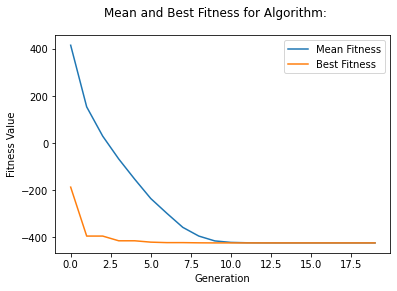

In [11]:
# greedy algorithm
algorithm.evolve(max_iter=20, algorithm='greedy', find_max=False)
algorithm.plot()

GENERATION 0:
  Best Fit: -230.38626223604138, Mean Fit: 409.06073833208734
GENERATION 1:
  Best Fit: -401.9349251878441, Mean Fit: 254.6969173694788
GENERATION 2:
  Best Fit: -401.9349251878441, Mean Fit: 189.3936943746069
GENERATION 3:
  Best Fit: -401.9349251878441, Mean Fit: 141.2005834348401
GENERATION 4:
  Best Fit: -401.9349251878441, Mean Fit: 101.76440977887738
GENERATION 5:
  Best Fit: -401.9349251878441, Mean Fit: 69.06733990873157
GENERATION 6:
  Best Fit: -401.9349251878441, Mean Fit: 37.1884964179914
GENERATION 7:
  Best Fit: -401.9349251878441, Mean Fit: 11.415530628136104
GENERATION 8:
  Best Fit: -401.9349251878441, Mean Fit: -12.277340742204883
GENERATION 9:
  Best Fit: -401.9349251878441, Mean Fit: -36.41657757349767
GENERATION 10:
  Best Fit: -401.9349251878441, Mean Fit: -57.03829108286893
GENERATION 11:
  Best Fit: -401.9349251878441, Mean Fit: -70.80046919523993
GENERATION 12:
  Best Fit: -407.03063390203675, Mean Fit: -92.57766881810184
GENERATION 13:
  Best Fit

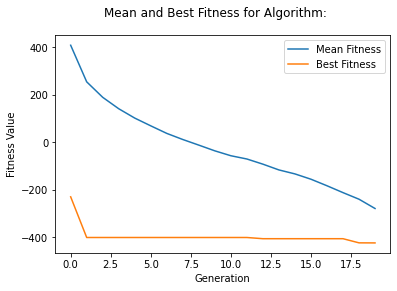

In [12]:
# differential algorithm
algorithm.evolve(max_iter=20, algorithm='differential', find_max=False)
algorithm.plot()

GENERATION 0:
  Best Fit: -92.87892297645828, Mean Fit: 417.1402407409448
GENERATION 1:
  Best Fit: -399.90397210499054, Mean Fit: 214.70816844975832
GENERATION 2:
  Best Fit: -399.90397210499054, Mean Fit: 130.20321246418618
GENERATION 3:
  Best Fit: -399.90397210499054, Mean Fit: 78.38850395024824
GENERATION 4:
  Best Fit: -407.7362851492434, Mean Fit: 45.42253851470263
GENERATION 5:
  Best Fit: -411.0710484077341, Mean Fit: 26.748936695840456
GENERATION 6:
  Best Fit: -411.0710484077341, Mean Fit: 7.509743830208618
GENERATION 7:
  Best Fit: -411.0710484077341, Mean Fit: -9.40339869865258
GENERATION 8:
  Best Fit: -411.0710484077341, Mean Fit: -22.081797022607415
GENERATION 9:
  Best Fit: -411.0710484077341, Mean Fit: -29.964265411124835
GENERATION 10:
  Best Fit: -411.0710484077341, Mean Fit: -39.24677586871729
GENERATION 11:
  Best Fit: -413.0453028632988, Mean Fit: -45.26873313691376
GENERATION 12:
  Best Fit: -418.29475672864567, Mean Fit: -55.16934213813004
GENERATION 13:
  Best

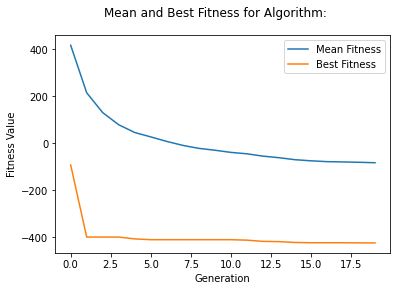

In [13]:
# self-adaptive algorithm
algorithm.evolve(max_iter=20, algorithm='self-adaptive', find_max=False)
algorithm.plot()

## Pareto-Front

In [20]:
import numpy as np

In [21]:
# define custom fitness function return function values for each objective
def fitness_functions(x):
    return np.asarray([f1(x), f2(x)]).T

In [22]:
algorithm = ga.ParetoFrontMOP(fitness_functions=fitness_functions, upper_bound=upper_bound, lower_bound=lower_bound, 
                              gen_size=200)

In [29]:
algorithm.evolve(max_iter=40, archive_iter=20, par_count=3, cross_method=1, max_distance=1.0)

 Archive Iteration: 1/20
Generation 40/40
 Archive Iteration: 2/20
Generation 40/40
   Archive Information:
   Distance - Min: 34.12217068430426, Max: 94.34534295022748, Median: 86.32793951765738, Std: 26.701126765765178
   Archive Size: 3
 Archive Iteration: 3/20
Generation 40/40
   Archive Information:
   Distance - Min: 0.38046399207388504, Max: 92.5685849490309, Median: 80.98449156716308, Std: 38.484976839720616
   Archive Size: 5
 Archive Iteration: 4/20
Generation 40/40
   Archive Information:
   Distance - Min: 0.38046399207388504, Max: 92.5685849490309, Median: 80.98449156716308, Std: 38.484976839720616
   Archive Size: 5
 Archive Iteration: 5/20
Generation 40/40
   Archive Information:
   Distance - Min: 0.38046399207388504, Max: 99.45516881101985, Median: 82.10072604145267, Std: 39.004534617201244
   Archive Size: 6
 Archive Iteration: 6/20
Generation 40/40
   Archive Information:
   Distance - Min: 0.38046399207388504, Max: 99.45516881101985, Median: 82.10072604145267, Std: 

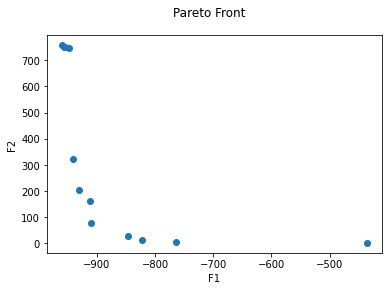

In [30]:
# plot function only works when the number of objectives is less than or equal to 3
algorithm.plot()

In [31]:
algorithm.evolve(max_iter=40, archive_iter=20, par_count=3, cross_method=1, max_distance=2.0)

 Archive Iteration: 1/20
Generation 40/40
 Archive Iteration: 2/20
Generation 40/40
   Archive Information:
   Distance - Min: 0.04078716583546793, Max: 63.29281868147926, Median: 26.25743832244151, Std: 18.699813808273273
   Archive Size: 7
 Archive Iteration: 3/20
Generation 40/40
   Archive Information:
   Distance - Min: 0.01987552410440685, Max: 1024.0847633987607, Median: 6.028989137988377, Std: 301.91859130738897
   Archive Size: 68
 Archive Iteration: 4/20
Generation 40/40
   Archive Information:
   Distance - Min: 44.27921113774691, Max: 91.01673759204644, Median: 46.872123937089164, Std: 21.447264758515587
   Archive Size: 3
 Archive Iteration: 5/20
Generation 40/40
   Archive Information:
   Distance - Min: 5.397535013084223, Max: 92.50387764772353, Median: 47.54840375315381, Std: 29.973789598588855
   Archive Size: 4
 Archive Iteration: 6/20
Generation 40/40
   Archive Information:
   Distance - Min: 1.843016189707169, Max: 99.1132241458241, Median: 48.29785265449593, Std: 

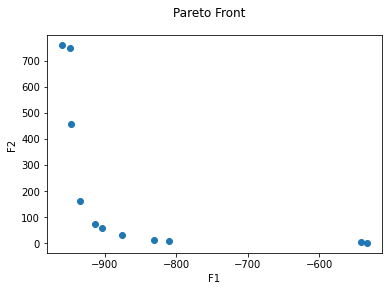

In [32]:
# plot function only works when the number of objectives is less than or equal to 3
algorithm.plot()